In [7]:
import gym


env = gym.make('CartPole-v0')
env.reset()

for _ in range(1000):
    env.render()
    env.step(env.action_space.sample())
    
env.close()

Установка под windows и conda: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30

Суть обучения с подкреплением: агент предпринимает действия в среде для улучшения своей награды. Оценка результатов действий формируется средой (которая может быть детерминированной или не детерминированной) и возвращается агенту. В самом простом случае, среда детерминирована и агент может построить функцию выбора следующего шага, оптимально достигнув цели (например, методами динамического программирования).  

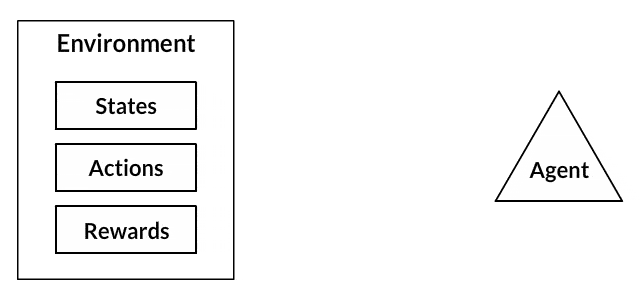

In [2]:
from IPython import display
display.Image("part/Reinforcement-Learning-Animation.gif")

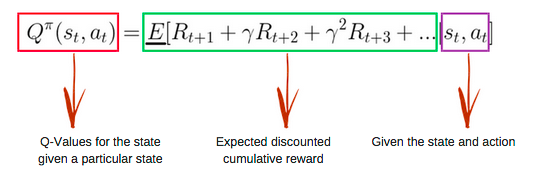

In [3]:
display.Image("part/belman.png")

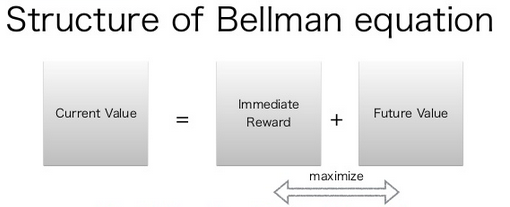

In [4]:
display.Image("part/belman2.png")

Пример: https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/

Поскольку агент (воображаемый водитель) мотивирован вознаграждением и собирается научиться управлять машиной с помощью пробных опытов в окружающей среде, нам необходимо определить награды и / или штрафы и их размер соответственно. Вот несколько моментов, которые следует учитывать:

- Агент должен получить высокую положительную награду за успешную посадку пассажира, потому что такое поведение очень желательно.
- Агент должен быть наказан, если он пытается высадить пассажира в неправильном месте.
- Агент должен получать небольшое отрицательное вознаграждение за то, что не добрался до пункта назначения после каждого временного шага. "Незначительный" минус, потому что мы предпочли бы, чтобы наш агент опаздывал, вместо того, чтобы делать неправильные шаги, пытаясь добраться до места назначения как можно быстрее.

В обучении с подкреплением агент обнаруживает состояние, а затем предпринимает действия в соответствии с состоянием, в котором он находится.

State Space - это набор всех возможных ситуаций, в которых может находиться наше такси. Состояние должно содержать полезную информацию, необходимую агенту для выполнения правильного действия.

Допустим, у нас есть тренировочная площадка для нашей Smartcab, где мы обучаем ее перевозить людей на стоянке в четыре разных места (R, G, Y, B):

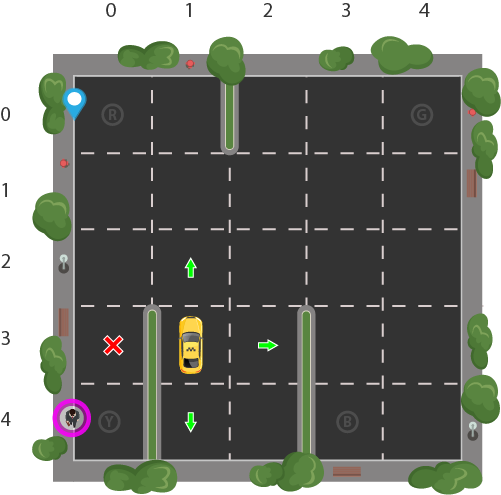

In [5]:
display.Image("part/Reinforcement_Learning_Taxi_Env.width-1200.png")

Предположим, Smartcab - единственный автомобиль на этой стоянке. Мы можем разбить парковку на сетку 5x5, что дает нам 25 возможных мест для стоянки такси. Эти 25 локаций являются частью нашего state space пространства. Обратите внимание, что текущее состояние местоположения нашего такси - координаты (3, 1).

Вы также заметите, что есть четыре (4) места, где мы можем забрать и высадить пассажира: R, G, Y, B или [(0,0), (0,4), (4,0), (4,3)] в координатах (строка, столбец). Наш иллюстрированный пассажир находится в локации Y, и они хотят отправиться в локацию R.

Также мы учитываем одно (1) дополнительное состояние пассажира нахождения внутри такси, мы можем взять все комбинации местоположений пассажиров и мест назначения, чтобы прийти к общему количеству состояний для нашей среды такси; есть четыре (4) пункта назначения и пять (4 + 1) пассажирских мест.

Итак, наша среда такси имеет 5х5х5х4 = 500 возможных состояний.

Агент попадает в одно из 500 состояний и выполняет действие. Действие в нашем случае может заключаться в том, чтобы двигаться в нужном направлении или принять решение о посадке / высадке пассажира.

Другими словами, у нас есть шесть возможных действий:

- 0 = south
- 1 = north
- 2 = east
- 3 = west
- 4 = pickup
- 5 = dropoff

Это пространство действий: набор всех действий, которые наш агент может предпринять в заданном состоянии.

На иллюстрации выше вы заметите, что такси не может выполнять определенные действия в определенных состояниях из-за стен. В коде окружения мы просто предоставим штраф -1 за каждое попадание в стену, и такси никуда не двинется. Это приведет к наложению штрафов, из-за чего такси решит обойти стену.

In [ ]:
# if not installed:
# !conda install -c conda-forge atari_py
import gym

env = gym.make("Taxi-v3").env

env.render()

Основным интерфейсом gym является env, который представляет собой интерфейс унифицированной среды. 
Ниже приведены методы env, которые могут быть нам весьма полезны:

- env.reset: сбрасывает среду и возвращает случайное начальное состояние.
- env.step (действие): Шагните в среду на один временной шаг. Возврат
- observation: Наблюдения за окружающей средой
- reward: было ли ваше действие полезным или нет
- done: указывает, успешно ли мы подобрали и высадили пассажира, это также называется одной серией
- info: дополнительная информация, такая как производительность и задержка, для целей отладки.
- env.render: отображает один кадр среды (полезно для визуализации среды)
Примечание. Мы используем .env в конце make, чтобы избежать остановки обучения на 200 итерациях, что является значением по умолчанию для новой версии Gym.

"Есть 4 места (помечены разными буквами), и наша задача - забрать пассажира в одном месте и высадить его в другом. Мы получаем +20 баллов за успешную высадку и теряем 1 балл каждый раз - шаг, который он делает. Существует также 10-балльный штраф за неправильную посадку и высадку".

In [ ]:
env.reset() # reset environment to a new, random state
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Напомним, что 500 состояний соответствуют кодировке местоположения такси, местоположения пассажира и места назначения.

Обучение с подкреплением изучит сопоставление состояний с оптимальным действием, которое нужно выполнить в этом состоянии, путем исследования, то есть агент исследует среду и предпринимает действия, основанные на вознаграждениях, определенных в среде.

Оптимальное действие для каждого состояния - это действие, которое имеет наибольшую совокупную долгосрочную награду.

In [7]:
state = env.encode(2, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
env.render()

State: 228
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



Затем мы можем установить состояние среды вручную с помощью env.env.s, используя это закодированное число. Вы можете поиграть с числами, и вы увидите, как такси, пассажир и пункт назначения перемещаются.

Когда создается среда Taxi, также создается начальная таблица вознаграждений, называемая `P`. Мы можем думать об этом как о матрице, которая имеет количество состояний в виде строк и количество действий в виде столбцов, states X actions матрицу.

Поскольку каждое состояние находится в этой матрице, мы можем видеть значения вознаграждения по умолчанию, присвоенные состоянию нашей иллюстрации:

In [11]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

{action: [(probability, nextstate, reward, done)]}

Цифры от 0 до 5 соответствуют действиям (юг, север, восток, запад, пикап, высадка), которые такси может выполнять в нашем текущем состоянии на иллюстрации.
В этом env вероятность всегда равна 1.0.
Следующее состояние - это состояние, в котором мы оказались бы, если бы предприняли действие по этому индексу словаря.
Все действия движения имеют награду -1, а действия подбора / высадки имеют награду -10 в этом конкретном состоянии. Если мы находимся в состоянии, когда в такси есть пассажир и оно находится наверху нужного пункта назначения, мы бы увидели награду в размере 20 при высадке (5).
done используется, чтобы сообщить нам, когда мы успешно высадили пассажира в нужном месте. Каждое успешное завершение серии - это конец серии.
Обратите внимание, что если бы наш агент решил исследовать действие 2 (2) в этом состоянии, он направился бы на восток в стену. Исходный код сделал невозможным перемещение такси по стене, поэтому, если такси выберет это действие, оно будет продолжать накапливать штраф -1, что влияет на долгосрочное вознаграждение.

Давайте попробуем решить задачу без использования RL:

In [8]:
env.s = 328  # set environment to illustration's state

epochs = 0
penalties, reward = 0, 0

frames = [] # for animation

done = False

while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1
    
    
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 2888
Penalties incurred: 1003


In [9]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 2888
State: 0
Action: 5
Reward: 20


В нашей среде такси у нас есть таблица вознаграждений P, из которой агент будет учиться. Он делает это, глядя на получение вознаграждения за выполнение действия в текущем состоянии, а затем обновляет значение Q, чтобы запомнить, было ли это действие полезным.

Значения, хранящиеся в Q-таблице, называются Q-значениями, и они отображаются на комбинацию (состояние, действие).

Q-значение для конкретной комбинации состояние-действие представляет «качество» действия, предпринятого из этого состояния. Более высокие значения Q означают больше шансов на получение большего вознаграждения.

Например, если такси столкнулось с состоянием, в котором пассажир находится в его текущем местоположении, весьма вероятно, что значение Q для посадки выше по сравнению с другими действиями, такими как высадка или движение на север.

Q-значения инициализируются произвольным значением, и по мере того, как агент подвергается воздействию окружающей среды и получает различные вознаграждения, выполняя различные действия, Q-значения обновляются с использованием уравнения:

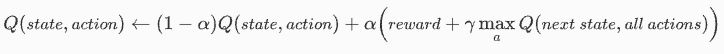

In [28]:
display.Image("part/ql1.jpg")

(альфа) - скорость обучения (0,1) - Как и в настройках контролируемого обучения, это степень, в которой наши Q-значения обновляются на каждой итерации.

(гамма) - коэффициент дисконтирования (0,1) - определяет, какое значение мы хотим придать будущим вознаграждениям. Высокое значение коэффициента дисконтирования (близкое к 1) отражает долгосрочное эффективное вознаграждение, тогда как коэффициент дисконтирования, равный 0, заставляет нашего агента рассматривать только немедленное вознаграждение, что делает его жадным. 

По сути, мы изучаем правильное действие, которое нужно предпринять в текущем состоянии, глядя на вознаграждение за текущее сочетание состояния / действия и максимальное вознаграждение за следующее состояние. Это в конечном итоге заставит наше такси рассматривать маршрут с лучшими связанными вместе наградами.

Q-значение пары состояние-действие - это сумма мгновенного вознаграждения и дисконтированного будущего вознаграждения (результирующего состояния). Мы храним Q-значения для каждого состояния и действия через Q-таблицу.

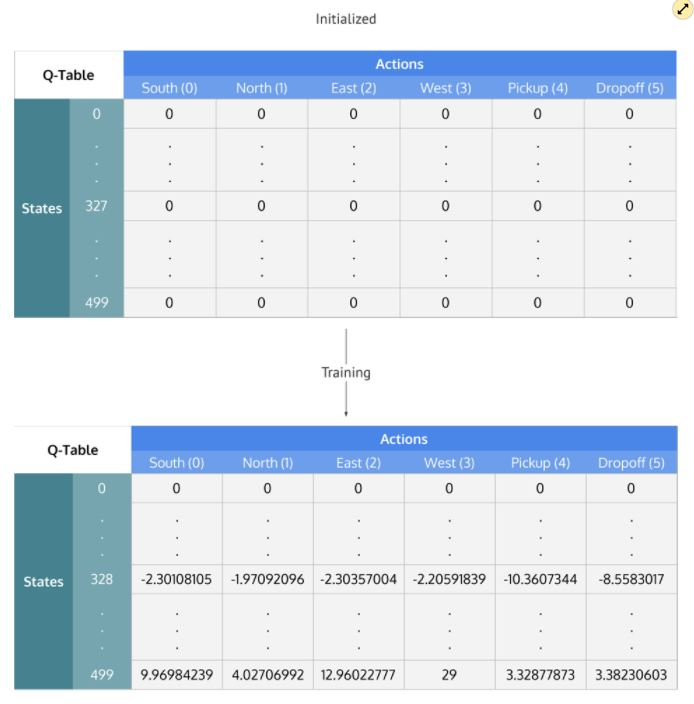

In [29]:
display.Image("part/qtable.jpg")

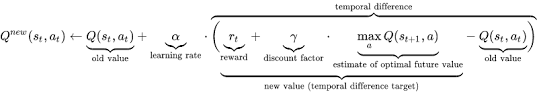

In [4]:
display.Image("part/qleraning2.png")

Существует компромисс между исследованием (выбор случайного действия) и эксплуатацией (выбор действий на основе уже изученных Q-значений). Мы хотим, чтобы действие не всегда выполнялось по одному и тому же маршруту и, возможно, переобучалось, поэтому мы введем еще один параметр, называемый «эпсилон», чтобы удовлетворить это во время обучения.

Вместо того, чтобы просто выбирать наиболее изученное действие с Q-значением, мы иногда предпочитаем дальнейшее изучение пространства действий. Более низкое значение эпсилон приводит к эпизодам с большим количеством штрафов (в среднем), что очевидно, потому что мы исследуем и принимаем случайные решения.

In [10]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [11]:
%%time
"""Training the agent"""

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 100000
Training finished.

Wall time: 49.9 s


In [13]:
q_table[328]

array([ -2.41124518,  -2.27325184,  -2.40947541,  -2.3506775 ,
       -10.68725137, -10.81022495])

In [14]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Results after 100 episodes:
Average timesteps per episode: 12.92
Average penalties per episode: 0.0


- (скорость обучения) должна снижаться по мере того, как вы продолжаете получать все большую и большую базу знаний.

- по мере того, как вы приближаетесь к крайнему сроку, ваше предпочтение краткосрочного вознаграждения должно возрастать, поскольку вы не будете действовать достаточно долго, чтобы получить долгосрочное вознаграждение, а это означает, что ваша гамма должна уменьшаться.

- по мере того, как мы разрабатываем нашу стратегию, нам меньше нужно исследовать и больше эксплуатировать, чтобы получить больше пользы от нашей политики (стратегии), поэтому по мере увеличения количества испытаний эпсилон должен уменьшаться.